In [15]:
import numpy as np
import pandas as pd
from plotnine import *

df = pd.read_csv("Data/Turbine_Data.csv")
#Drop useless columns such as WTG, since we are only looking at one Wind Turbine so this value is constant
del(df["WTG"])
#The only values for this Column are 0 and NaN, so drop it
del(df["ControlBoxTemperature"])
df.rename(columns={"Unnamed: 0":"Time"}, inplace=True)
df["Time"] = pd.to_datetime(df["Time"])
print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118224 entries, 0 to 118223
Data columns (total 20 columns):
 #   Column                        Non-Null Count   Dtype              
---  ------                        --------------   -----              
 0   Time                          118224 non-null  datetime64[ns, UTC]
 1   ActivePower                   94750 non-null   float64            
 2   AmbientTemperatue             93817 non-null   float64            
 3   BearingShaftTemperature       62518 non-null   float64            
 4   Blade1PitchAngle              41996 non-null   float64            
 5   Blade2PitchAngle              41891 non-null   float64            
 6   Blade3PitchAngle              41891 non-null   float64            
 7   GearboxBearingTemperature     62540 non-null   float64            
 8   GearboxOilTemperature         62438 non-null   float64            
 9   GeneratorRPM                  62295 non-null   float64            
 10  GeneratorWinding1Tem

,Time,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WindDirection,WindSpeed
0,2017-12-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-12-31 00:10:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-12-31 00:20:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-12-31 00:30:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-12-31 00:40:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118219,2020-03-30 23:10:00+00:00,70.044465,27.523741,45.711129,1.515669,1.950088,1.950088,59.821165,55.193793,1029.870744,59.060367,58.148777,39.008931,36.476562,178.0,13.775785,9.234004,2.0,178.0,3.533445
118220,2020-03-30 23:20:00+00:00,40.833474,27.602882,45.598573,1.702809,2.136732,2.136732,59.142038,54.798545,1030.160478,58.452003,57.550367,39.006759,36.328125,178.0,8.088928,9.229370,2.0,178.0,3.261231
118221,2020-03-30 23:30:00+00:00,20.777790,27.560925,45.462045,1.706214,2.139664,2.139664,58.439439,54.380456,1030.137822,58.034071,57.099335,39.003815,36.131944,178.0,4.355978,9.236802,2.0,178.0,3.331839
118222,2020-03-30 23:40:00+00:00,62.091039,27.810472,45.343827,1.575352,2.009781,2.009781,58.205413,54.079014,1030.178178,57.795387,56.847239,39.003815,36.007805,190.0,12.018077,9.237374,2.0,190.0,3.284468


In [16]:
#Display the percent of null values from each row
df.isnull().sum() / df.shape[0]

Time                            0.000000
ActivePower                     0.198555
AmbientTemperatue               0.206447
BearingShaftTemperature         0.471190
Blade1PitchAngle                0.644776
Blade2PitchAngle                0.645664
Blade3PitchAngle                0.645664
GearboxBearingTemperature       0.471004
GearboxOilTemperature           0.471867
GeneratorRPM                    0.473077
GeneratorWinding1Temperature    0.471960
GeneratorWinding2Temperature    0.471774
HubTemperature                  0.472138
MainBoxTemperature              0.471283
NacellePosition                 0.388635
ReactivePower                   0.198572
RotorRPM                        0.474498
TurbineStatus                   0.467891
WindDirection                   0.388635
WindSpeed                       0.199866
dtype: float64

In [17]:
#Data Cleaning
#Make it so that rows that are solely null values are dropped
noTime = df.drop('Time', axis=1, inplace=False)
#Store it as a new dataframe to prevent errors when working on a dataframe copy
df = pd.DataFrame(df[noTime.notnull().any(axis=1)])
df


,Time,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WindDirection,WindSpeed
144,2018-01-01 00:00:00+00:00,-5.357727,23.148729,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,-9.960830,NaN,NaN,8.000000,2.279088
145,2018-01-01 00:10:00+00:00,-5.822360,23.039754,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,300.428571,-9.628441,NaN,NaN,300.428571,2.339343
146,2018-01-01 00:20:00+00:00,-5.279409,22.948703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,340.000000,-9.491235,NaN,NaN,340.000000,2.455610
147,2018-01-01 00:30:00+00:00,-4.648054,22.966851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,345.000000,-9.856136,NaN,NaN,345.000000,2.026754
148,2018-01-01 00:40:00+00:00,-4.684632,22.936520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,345.000000,-9.745593,NaN,NaN,345.000000,1.831420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118219,2020-03-30 23:10:00+00:00,70.044465,27.523741,45.711129,1.515669,1.950088,1.950088,59.821165,55.193793,1029.870744,59.060367,58.148777,39.008931,36.476562,178.000000,13.775785,9.234004,2.0,178.000000,3.533445
118220,2020-03-30 23:20:00+00:00,40.833474,27.602882,45.598573,1.702809,2.136732,2.136732,59.142038,54.798545,1030.160478,58.452003,57.550367,39.006759,36.328125,178.000000,8.088928,9.229370,2.0,178.000000,3.261231
118221,2020-03-30 23:30:00+00:00,20.777790,27.560925,45.462045,1.706214,2.139664,2.139664,58.439439,54.380456,1030.137822,58.034071,57.099335,39.003815,36.131944,178.000000,4.355978,9.236802,2.0,178.000000,3.331839
118222,2020-03-30 23:40:00+00:00,62.091039,27.810472,45.343827,1.575352,2.009781,2.009781,58.205413,54.079014,1030.178178,57.795387,56.847239,39.003815,36.007805,190.000000,12.018077,9.237374,2.0,190.000000,3.284468


In [18]:
#Get the low NULL percent Columns and graph
nullPer =  df.isnull().sum() / df.shape[0]
lowNullCount = []
for nullP in nullPer:
    if((nullP > 0.0) & (nullP < .05)):
        lowNullCount.append(nullPer[nullPer == nullP].index[0])
plotList = []
for col in lowNullCount:
    plotList.append(ggplot(df) + aes(x=col) + geom_histogram(bins=20))

/usr/lib/python3.10/site-packages/plotnine/layer.py:324: PlotnineWarning: stat_bin : Removed 740 rows containing non-finite values.


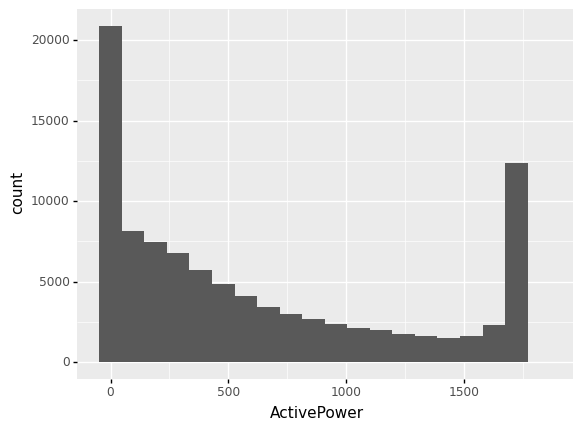

<ggplot: (8753397415726)>

In [19]:
plotList[0]

/usr/lib/python3.10/site-packages/plotnine/layer.py:324: PlotnineWarning: stat_bin : Removed 1673 rows containing non-finite values.


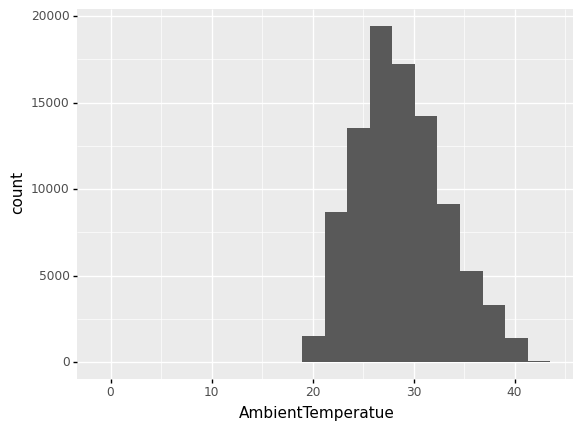

<ggplot: (8753397422555)>

In [20]:
plotList[1]

/usr/lib/python3.10/site-packages/plotnine/layer.py:324: PlotnineWarning: stat_bin : Removed 742 rows containing non-finite values.


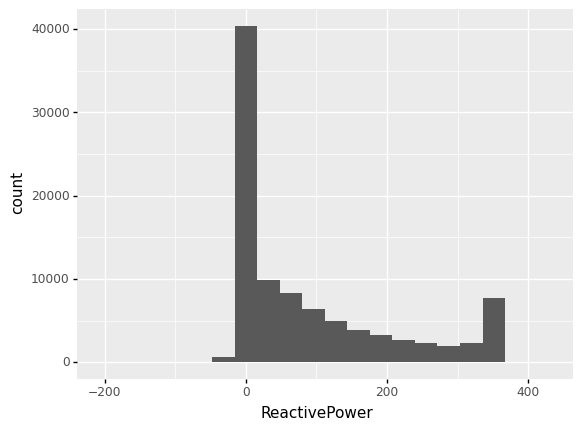

<ggplot: (8753398208503)>

In [21]:
plotList[2]

/usr/lib/python3.10/site-packages/plotnine/layer.py:324: PlotnineWarning: stat_bin : Removed 895 rows containing non-finite values.


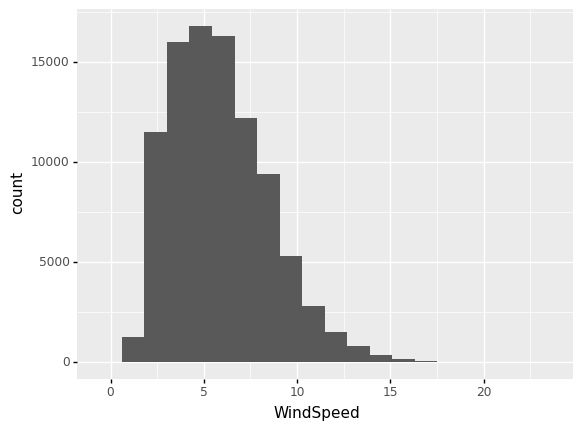

<ggplot: (8753398205419)>

In [22]:
plotList[3]

In [23]:
#Fill in the initial missing values now
for col in lowNullCount:
    df[col].fillna(df[col].median(), inplace=True)
df.isnull().sum() / df.shape[0]


Time                            0.000000
ActivePower                     0.000000
AmbientTemperatue               0.000000
BearingShaftTemperature         0.345293
Blade1PitchAngle                0.560205
Blade2PitchAngle                0.561305
Blade3PitchAngle                0.561305
GearboxBearingTemperature       0.345062
GearboxOilTemperature           0.346130
GeneratorRPM                    0.347628
GeneratorWinding1Temperature    0.346246
GeneratorWinding2Temperature    0.346015
HubTemperature                  0.346466
MainBoxTemperature              0.345408
NacellePosition                 0.243083
ReactivePower                   0.000000
RotorRPM                        0.349387
TurbineStatus                   0.341209
WindDirection                   0.243083
WindSpeed                       0.000000
dtype: float64

In [33]:
#Verify that the rest of the columns are not categorical, aka show that we shouldnt use the mode to fill the null data
uncleanedRows = df.drop(lowNullCount, axis=1, inplace=False)
uncleanedRows = uncleanedRows.drop("Time", axis=1, inplace=False)
for col in uncleanedRows.columns:
    print(col + " : " + str(uncleanedRows[col].unique().size))

BearingShaftTemperature : 62287
Blade1PitchAngle : 38947
Blade2PitchAngle : 39022
Blade3PitchAngle : 39022
GearboxBearingTemperature : 62314
GearboxOilTemperature : 62413
GeneratorRPM : 61075
GeneratorWinding1Temperature : 62407
GeneratorWinding2Temperature : 62425
HubTemperature : 38120
MainBoxTemperature : 49146
NacellePosition : 6665
RotorRPM : 59255
TurbineStatus : 354
WindDirection : 6665
